In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import dgl
import dgl.function as fn
import math
import networkx as nx
import matplotlib

from dgl.nn.pytorch.glob import AvgPooling

# Reduce Functions

## dgl.function.sum

### Build a toy graph

/home/zayed/anaconda3/envs/arma_dgl/lib/python3.8/site-packages/dgl/heterograph.py:72: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning('Recommend creating graphs by `dgl.graph(data)`'


G: Graph(num_nodes=4, num_edges=3,
      ndata_schemes={}
      edata_schemes={})


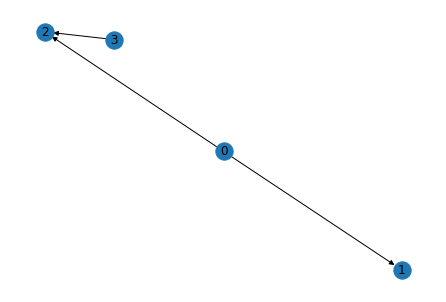

In [5]:
u = torch.tensor([0, 0, 3])
v = torch.tensor([1, 2, 2])
G = dgl.DGLGraph((u, v))
nx.draw(G.to_networkx(), with_labels=True)

print("G:", G)

### Result of fn.sum

In [13]:
print("G.number_of_nodes():", G.number_of_nodes())
G.ndata['h'] = torch.randn((G.number_of_nodes(), 2))
print(G.ndata['h'])

G.update_all(fn.copy_u('h', 'm'), fn.sum('m', 'h_sum'))
print(G.ndata['h_sum'])

G.number_of_nodes(): 4
tensor([[ 0.4760,  0.0927],
        [ 2.1297, -0.5760],
        [ 0.6659,  0.1621],
        [-1.1798, -0.4679]])
tensor([[ 0.0000,  0.0000],
        [ 0.4760,  0.0927],
        [-0.7038, -0.3752],
        [ 0.0000,  0.0000]])
